In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay, classification_report

## We use two different models: XGBoost and RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

/home/danilo/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/danilo/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
df = pd.read_csv('hr_employee_data.csv')

In [3]:
df

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

empid                    0
satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,low,1
14995,14996,0.37,0.48,2,160,3,0,0,low,1
14996,14997,0.37,0.53,2,143,3,0,0,low,1
14997,14998,0.11,0.96,6,280,4,0,0,low,1


In [8]:
df = df.drop("empid", axis= 1)

In [9]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,low,1
14995,0.37,0.48,2,160,3,0,0,low,1
14996,0.37,0.53,2,143,3,0,0,low,1
14997,0.11,0.96,6,280,4,0,0,low,1


In [10]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
one_hot_salary = pd.get_dummies(df['salary'])

In [12]:
df = df.drop('salary', axis= 1)

In [13]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1
14995,0.37,0.48,2,160,3,0,0,1
14996,0.37,0.53,2,143,3,0,0,1
14997,0.11,0.96,6,280,4,0,0,1


In [14]:
one_hot_salary

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [15]:
df = pd.concat([df, one_hot_salary], axis=1)

In [16]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,high,low,medium
0,0.38,0.53,2,157,3,0,0,1,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,1,0


In [17]:
X = df.drop('left', axis=1)
y = df['left']

X = np.array(X)
y = np.array(y)

In [18]:
X.shape, y.shape

((14997, 10), (14997,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

In [20]:
# Create a dictionary w/ hyperparameters
model_params = {
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "param": {
            "n_estimators": [10, 20, 30, 40, 50, 100, 130]
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(),
        "param": {
            "n_estimators": [10, 20, 30, 40, 50, 100, 130]
        }
    }
}

In [21]:
scores = []
for model_name, model_params in model_params.items():
    model = GridSearchCV(estimator = model_params['model'], param_grid = model_params['param'], cv=5)
    model.fit(X,y)
    scores.append({
        "model" : model_name,
        "best_score" : model.best_score_,
        "best_params" : model.best_params_
    })

In [22]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9916653106591085,
  'best_params': {'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9890646437701456,
  'best_params': {'n_estimators': 130}}]

In [23]:
## Best model is RandomForestClassifier, so we choose it

In [25]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X,y)

RandomForestClassifier(n_estimators=50)

In [29]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [31]:
test_acc = accuracy_score(y_test, y_test_pred)
train_acc = accuracy_score(y_train, y_train_pred)

In [32]:
test_acc, train_acc

(0.9997333333333334, 1.0)

In [33]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [34]:
test_mae, train_mae

(0.0002666666666666667, 0.0)

In [36]:
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)

CONFUSION_MATRIX = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= model.classes_)

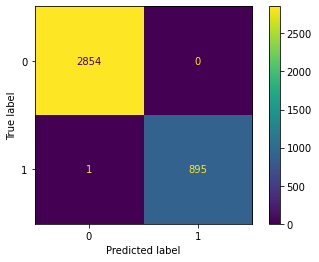

In [38]:
CONFUSION_MATRIX.plot()